In [20]:
#Import packages

import numpy as np
import pandas as pd
import seaborn as sns

import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

from scipy import stats
from scipy.stats import norm
from sklearn.dummy import DummyRegressor
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder
from statsmodels.formula.api import ols
from sklearn.metrics import mean_squared_error as MSE
from sklearn.model_selection import train_test_split, cross_validate, ShuffleSplit, KFold, cross_val_score


In [2]:
#Import dataset
data_relevant = pd.read_csv('data_relevant.csv')
data_relevant

,Unnamed: 0,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_garage,sqft_patio,yr_built,postal_code,grade_code,condition_code,price_sqft
0,21,750000.0,3,2.0,1590,7754,1.0,440,0,1990,98038,7,4,471.698113
1,25,580000.0,3,3.0,2020,4482,1.0,600,120,1992,98031,7,3,287.128713
2,26,2000000.0,3,3.0,2700,7694,1.0,530,640,2006,98053,9,3,740.740741
3,34,785000.0,3,2.0,1350,7354,1.0,460,120,1985,98133,7,5,581.481481
4,39,1680000.0,3,2.5,5200,206039,1.0,1080,670,2007,98092,10,3,323.076923
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2732,30119,500000.0,3,2.5,1610,7250,1.0,490,270,1978,98168,7,3,310.559006
2733,30128,560000.0,3,2.0,1480,8770,1.0,540,180,1985,98023,7,4,378.378378
2734,30138,1011000.0,3,2.0,1460,10995,1.0,460,180,1981,98052,8,3,692.465753
2735,30142,880000.0,4,2.5,2260,5661,1.0,460,230,2000,98108,8,3,389.380531


In [3]:
data_relevant = data_relevant.drop(columns=['Unnamed: 0', 'floors'])

data_relevant.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,sqft_garage,sqft_patio,yr_built,postal_code,grade_code,condition_code,price_sqft
0,750000.0,3,2.0,1590,7754,440,0,1990,98038,7,4,471.698113
1,580000.0,3,3.0,2020,4482,600,120,1992,98031,7,3,287.128713
2,2000000.0,3,3.0,2700,7694,530,640,2006,98053,9,3,740.740741
3,785000.0,3,2.0,1350,7354,460,120,1985,98133,7,5,581.481481
4,1680000.0,3,2.5,5200,206039,1080,670,2007,98092,10,3,323.076923


In [4]:
data_relevant

,price,bedrooms,bathrooms,sqft_living,sqft_lot,sqft_garage,sqft_patio,yr_built,postal_code,grade_code,condition_code,price_sqft
0,750000.0,3,2.0,1590,7754,440,0,1990,98038,7,4,471.698113
1,580000.0,3,3.0,2020,4482,600,120,1992,98031,7,3,287.128713
2,2000000.0,3,3.0,2700,7694,530,640,2006,98053,9,3,740.740741
3,785000.0,3,2.0,1350,7354,460,120,1985,98133,7,5,581.481481
4,1680000.0,3,2.5,5200,206039,1080,670,2007,98092,10,3,323.076923
...,...,...,...,...,...,...,...,...,...,...,...,...
2732,500000.0,3,2.5,1610,7250,490,270,1978,98168,7,3,310.559006
2733,560000.0,3,2.0,1480,8770,540,180,1985,98023,7,4,378.378378
2734,1011000.0,3,2.0,1460,10995,460,180,1981,98052,8,3,692.465753
2735,880000.0,4,2.5,2260,5661,460,230,2000,98108,8,3,389.380531


# Dummy Model testing / Baseline

In [5]:
train = data_relevant
test = data_relevant

X_train = train.drop('price', axis=1)
y_train = train['price']

X_test = test.drop("price", axis=1)
y_test = test["price"]

X_train

,bedrooms,bathrooms,sqft_living,sqft_lot,sqft_garage,sqft_patio,yr_built,postal_code,grade_code,condition_code,price_sqft
0,3,2.0,1590,7754,440,0,1990,98038,7,4,471.698113
1,3,3.0,2020,4482,600,120,1992,98031,7,3,287.128713
2,3,3.0,2700,7694,530,640,2006,98053,9,3,740.740741
3,3,2.0,1350,7354,460,120,1985,98133,7,5,581.481481
4,3,2.5,5200,206039,1080,670,2007,98092,10,3,323.076923
...,...,...,...,...,...,...,...,...,...,...,...
2732,3,2.5,1610,7250,490,270,1978,98168,7,3,310.559006
2733,3,2.0,1480,8770,540,180,1985,98023,7,4,378.378378
2734,3,2.0,1460,10995,460,180,1981,98052,8,3,692.465753
2735,4,2.5,2260,5661,460,230,2000,98108,8,3,389.380531


In [6]:
X = data_relevant
y = data_relevant['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 1337)

dummy_regr = DummyRegressor()
dummy_regr.fit(X_train, y_train)
dummy_regr.predict(X_train)
dummy_regr.predict(X_test)
dummy_regr.score(X_train, y_train)
dummy_regr.score(X_test, y_test)
dummy_train_RMSE = MSE(y_train,dummy_regr.predict(X_train), squared = False)
dummy_test_RMSE = MSE(y_test,dummy_regr.predict(X_test), squared = False)


print()
print(f'Baseline Model Train Score: {dummy_regr.score(X_train, y_train)}')
print(f'Baseline Model Train RMSE: {round(dummy_train_RMSE)}')
print()
print(f'Baseline Model Test Score: {dummy_regr.score(X_test, y_test)}')
print(f'Baseline Model Test RMSE: {round(dummy_test_RMSE)}')


Baseline Model Train Score: 0.0
Baseline Model Train RMSE: 383426.0

Baseline Model Test Score: -8.245490061442595e-05
Baseline Model Test RMSE: 393394.0


## Simple Model

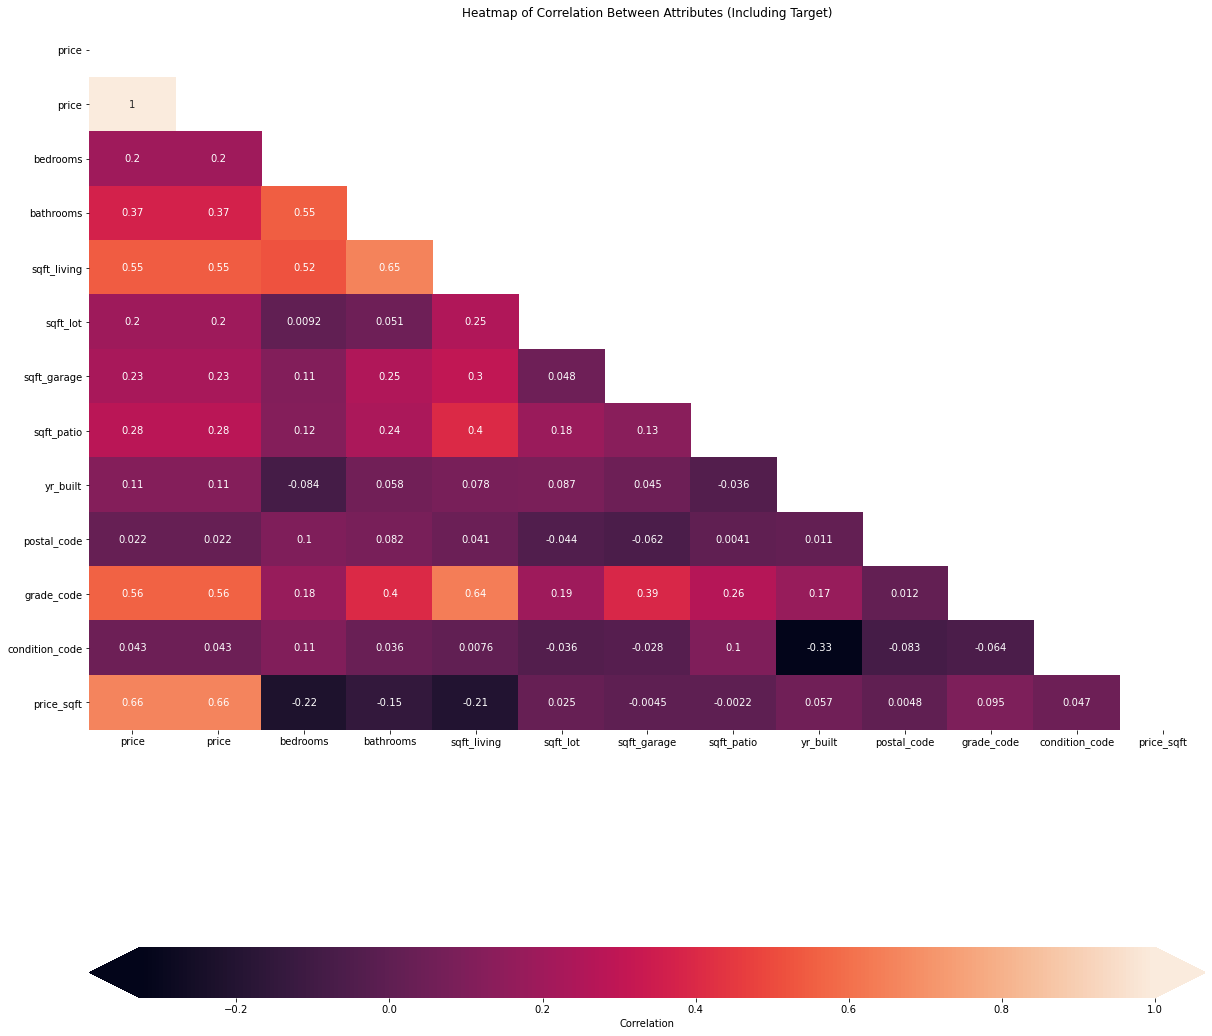

In [7]:
# Create a df with the target as the first column,
# then compute the correlation matrix
heatmap_data = pd.concat([y_train, X_train], axis=1)
corr = heatmap_data.corr()

# Set up figure and axes
fig, ax = plt.subplots(figsize=(20, 20))

# Plot a heatmap of the correlation matrix, with both
# numbers and colors indicating the correlations
sns.heatmap(
    # Specifies the data to be plotted
    data=corr,
    # The mask means we only show half the values,
    # instead of showing duplicates. It's optional.
    mask=np.triu(np.ones_like(corr, dtype=bool)),
    # Specifies that we should use the existing axes
    ax=ax,
    # Specifies that we want labels, not just colors
    annot=True,
    # Customizes colorbar appearance
    cbar_kws={"label": "Correlation", "orientation": "horizontal", "pad": .2, "extend": "both"}
)

# Customize the plot appearance
ax.set_title("Heatmap of Correlation Between Attributes (Including Target)");

In [9]:
data_relevant.corr()['price'].map(abs).sort_values(ascending=False)

price             1.000000
price_sqft        0.674012
grade_code        0.565665
sqft_living       0.544949
bathrooms         0.356044
sqft_patio        0.273054
sqft_garage       0.220639
bedrooms          0.176019
sqft_lot          0.174579
yr_built          0.094572
condition_code    0.031192
postal_code       0.004452
Name: price, dtype: float64

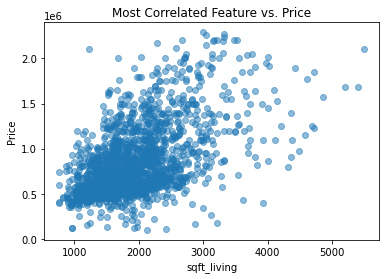

In [18]:
fig, ax = plt.subplots()

ax.scatter(X_train['sqft_living'], y_train, alpha=0.5)
ax.set_xlabel(most_correlated_feature)
ax.set_ylabel("Price")
ax.set_title("Most Correlated Feature vs. Price");

In [16]:
X_train_simple_model = X_train[['sqft_living']]
X_test_simple_model = X_test[['sqft_living']]

splitter = ShuffleSplit(n_splits=3, test_size=0.25, random_state=420)

simple_model = LinearRegression()
simple_model.fit(X_train_simple_model,y_train)

simple_model_scores = cross_validate(
    estimator=simple_model,
    X=df_ord[['sqft_living']],
    y=df_ord.price,
    return_train_score=True,
    cv=splitter
)

simple_predict_train = simple_model.predict(X_train_simple_model)
simple_predict_test = simple_model.predict(X_test_simple_model)

simple_train_RMSE = MSE(y_train,simple_predict_train,squared = False)
simple_test_RMSE = MSE(y_test,simple_predict_test, squared = False)

simple_condition_num = sm.OLS(y_train, sm.add_constant(X_train_simple_model)).fit().condition_number

print(f'Simple Model Train score: {simple_model_scores["train_score"].mean()}')
print(f'Simple Model Train RMSE: {round(simple_train_RMSE)}')
print(f'Simple Model Train Condition Number: {simple_condition_num}')
print()
print("Simple Model Test score: ", simple_model_scores["test_score"].mean())
print(f'Simple Model Test RMSE: {round(simple_test_RMSE)}')

Simple Model Train score: nan
Simple Model Train RMSE: 320728.0
Simple Model Train Condition Number: 6357.027070195866

Simple Model Test score:  nan
Simple Model Test RMSE: 331435.0


/Users/anniezheng/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/anniezheng/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/anniezheng/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/linear_model/_base.py", line 505, in fit
    X, y = self._validate_data(X, y, accept_sparse=['csr', 'csc', 'coo'],
  File "/Users/anniezheng/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/base.py", line 432, in _validate_data
    X, y = check_X_y(X, y, **check_params)
  File "/Users/anniezheng/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/utils/validation.py", line 72, in inner_f
   